## Spelling analysis

In [1]:
import pandas as pd

In [20]:
primary_words = ['fan', 'pet', 'dig', 'rob', 'hope', 'wait', 'gum', 'sled', 'stick', 'shine', 'dream', 'blade',
               'coach', 'fright', 'chewed', 'crawl', 'wishes', 'thorn', 'shouted', 'spoil', 'growl', 
               'third', 'camped', 'tries', 'clapping', 'riding']


word_list = primary_words

In [21]:
cols_pre = ['timestamp', 'client-id', 'L1', 'date', 'proctor-name', 'stage']
cols_post = ['final-consonants', 'short-vowels', 'digraphs', 'blends', 'common-long-vowels', 'other-vowels', 
        'inflected-endings','feature-points','total-spelled-correctly', 'predicted-stage']

cols_inner = ['{}-spelling', '{}-feature-points', '{}-is-correct', '{}-is-last']

new_inner = [x.format(p) for p in word_list for x in cols_inner]

cols = cols_pre + new_inner + cols_post

In [41]:
data = pd.read_csv('data/primary.csv', names=cols, skiprows=1)
data = data.fillna('UNK')

In [49]:
word_spellings = dict()

for w in word_list:
    word_spellings[w] = [s for s in data['{}-spelling'.format(w)] if s != 'UNK']

In [50]:
len(word_spellings)

26

### Plot distributions of spellings for each word

In [75]:
from collections import Counter as ctr
import matplotlib.pyplot as plt
import numpy as np

fan


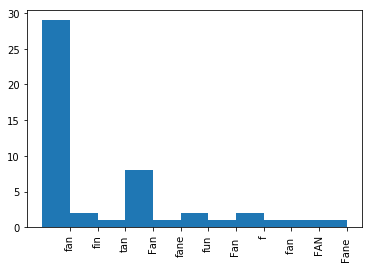

pet


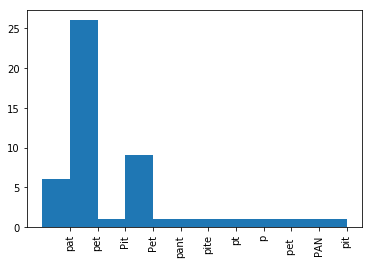

dig


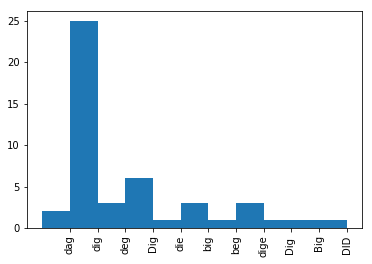

rob


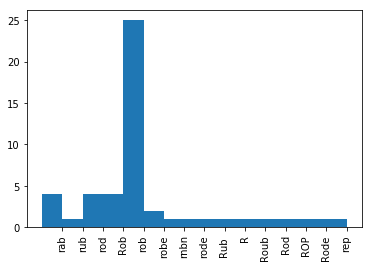

hope


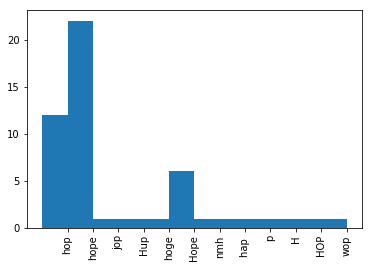

wait


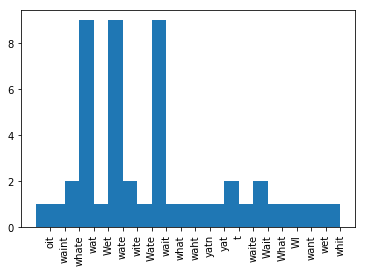

gum


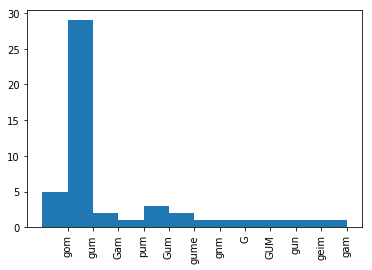

sled


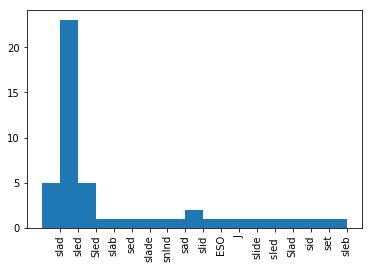

stick


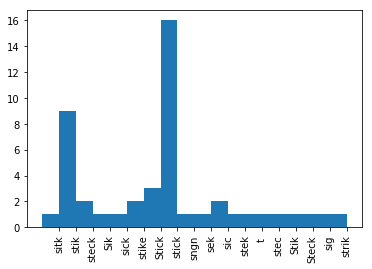

shine


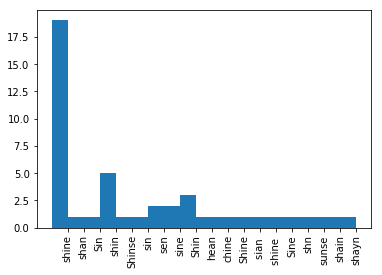

dream


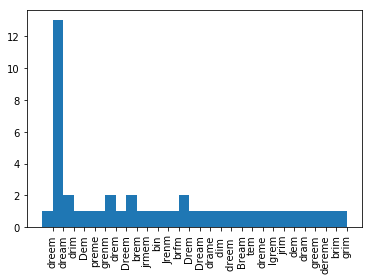

blade


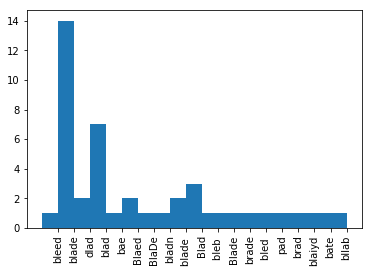

coach


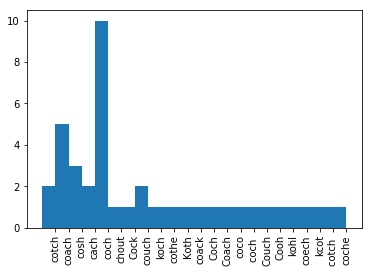

fright


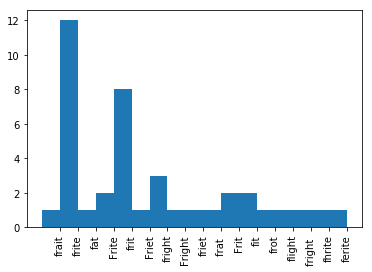

chewed


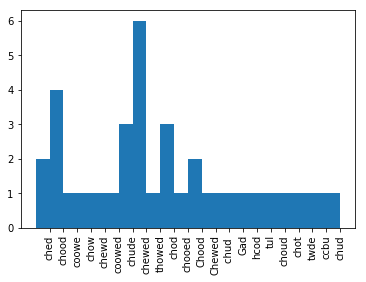

crawl


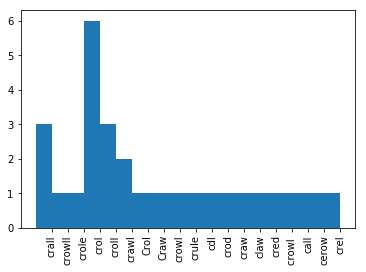

wishes


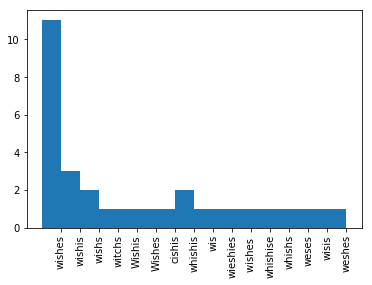

thorn


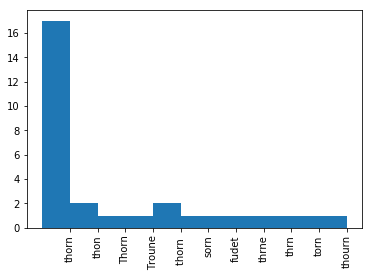

shouted


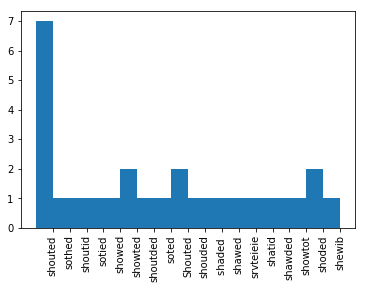

spoil


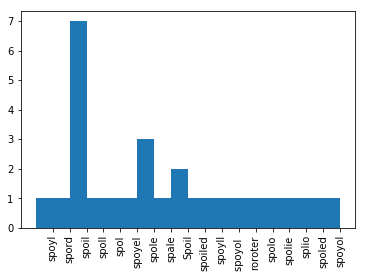

growl


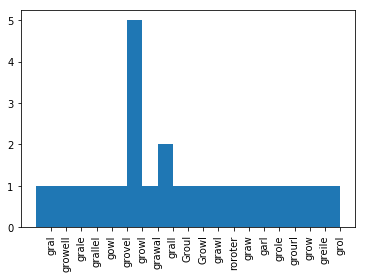

third


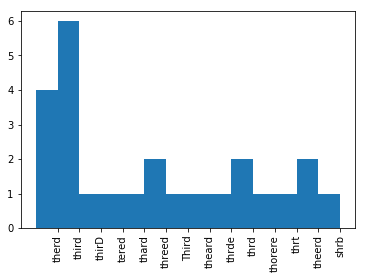

camped


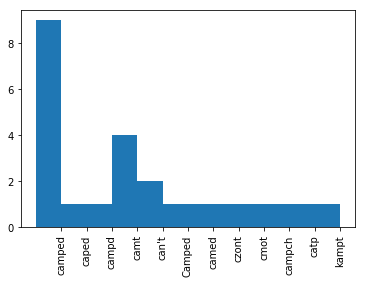

tries


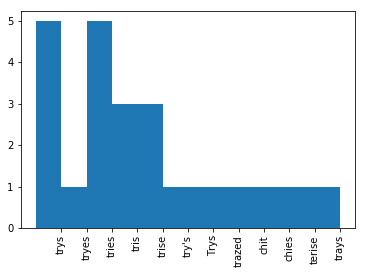

clapping


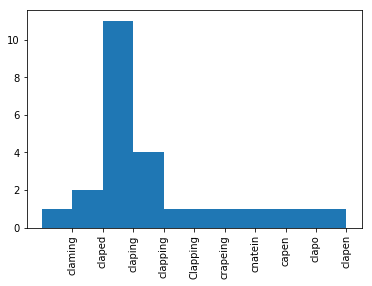

riding


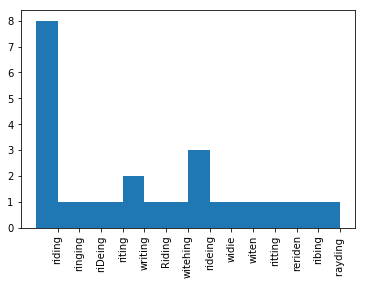

In [77]:
for w in word_spellings: 
    print(w)
    labels, values = zip(*ctr(word_spellings[w]).items())

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels, rotation=90)
    plt.show()

### Count, plot character bigrams

In [116]:
from textblob import Word, TextBlob

In [134]:
order = 2

all_spellings = []
for w in word_spellings:
    spellings = [' '.join(x) for x in word_spellings[w]]
    blobs = [TextBlob(x).ngrams(order) for x in spellings]
    blobs = [x for i in blobs for x in i]
    blobs = [' '.join(x) for x in blobs]
    all_spellings += blobs
    print(w, len(word_spellings[w]))
    print(ctr(blobs).most_common())
    

fan 49
[('a n', 42), ('f a', 31), ('F a', 10), ('f i', 2), ('i n', 2), ('n e', 2), ('f u', 2), ('u n', 2), ('t a', 1), ('F A', 1), ('A N', 1)]
pet 49
[('e t', 36), ('p e', 27), ('P e', 9), ('p a', 7), ('a t', 6), ('i t', 3), ('p i', 2), ('P i', 1), ('a n', 1), ('n t', 1), ('t e', 1), ('p t', 1), ('P A', 1), ('A N', 1)]
dig 47
[('i g', 39), ('d i', 29), ('D i', 7), ('e g', 4), ('d e', 3), ('b i', 3), ('g e', 3), ('d a', 2), ('a g', 2), ('i e', 1), ('b e', 1), ('B i', 1), ('D I', 1), ('I D', 1)]
rob 49
[('r o', 32), ('o b', 31), ('o d', 7), ('R o', 7), ('r a', 4), ('a b', 4), ('u b', 3), ('b e', 2), ('d e', 2), ('r u', 1), ('r n', 1), ('n b', 1), ('b n', 1), ('R u', 1), ('o u', 1), ('R O', 1), ('O P', 1), ('r e', 1), ('e p', 1)]
hope 49
[('o p', 42), ('h o', 35), ('p e', 28), ('H o', 6), ('j o', 1), ('H u', 1), ('u p', 1), ('o g', 1), ('g e', 1), ('n m', 1), ('m h', 1), ('h a', 1), ('a p', 1), ('H O', 1), ('O P', 1), ('w o', 1)]
wait 49
[('w a', 31), ('a t', 25), ('i t', 16), ('t e', 15)

### Observations

- there are orthographic ambiguities as well as phonetic ambiguities
- I would also argue for semantic ambiguity; i.e., children will understand a word like "rub" before they understand a word like "rob"; forcing their top-down processing to hear a familiar vs. an unfamiliar rendering
- the same is true for sub-word lexemes like "ing" or "ed" (see shouted)

### Questions:

- Is there a list of words that children are generally exposed to developmentally (i.e., their spoken not written forms)?

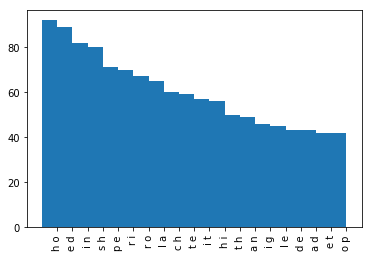

In [123]:
labels, values = zip(*ctr(all_spellings).most_common(20))
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.show()

### Use the following to calculate the probability that w2 follows w1 (e.g., P(W2|W1))

In [155]:
def calc_prob(word_spellings, w1, w2):
    all_spellings = []
    for w in word_spellings:
        spellings = [' '.join(x) for x in word_spellings[w]]
        blobs = [TextBlob(x).ngrams(order) for x in spellings]
        blobs = [x for i in blobs for x in i]
        all_spellings+=blobs
    lefts = [x for x in all_spellings if x[0] == w1]
    rights = [x for x in lefts if x[1] == w2]
    print('P({})'.format(w1), len(lefts) / len(all_spellings))
    print('P({}|{})'.format(w2,w1), len(rights)/len(lefts))

In [163]:
calc_prob(word_spellings, 'e', 'd')

P(e) 0.08137376237623763
P(d|e) 0.33840304182509506


### Try a standard spell checker

In [162]:
correct = []
for w in word_spellings:
    for s in word_spellings[w]:
        b = TextBlob(s).correct()
        correct.append(w==b)

sum(correct)/len(correct)

0.39300411522633744